# Proyecto Final

El problema que se trató de resolver es el de predecir la trayectoria de un sistema fisico conformado por dos péndulos de igual masa y longitud, acoplados por un resorte cuya constante de elasticidad es conocida. Usando el procedimiento de Lagrange en el sistema, se llegó al siguiente sistema de ecuaciones diferenciales:

$$
    mL^2\ddot{\theta} = -mgL\sin\theta - kL^2 \cos\theta (\sin\theta - \sin\phi)\\
    mL^2\ddot{\phi} = -mgL\sin\phi - kL^2 \sin\phi \cos\phi + kL^2 \sin\theta \cos\phi
$$

El problema es que este sistema no es lineal, y por tanto encontrar una solución exacta es muy complicado. Sin embargo, puede reducirse a un sistema lineal si se suponen angulos pequeños, es decir, 
 $$
    \theta \approx 0,\qquad \sin\theta \approx \theta,\qquad \cos\theta \approx 1 \\ 
    \phi \approx 0,\qquad \sin\phi \approx \phi,\qquad \cos\phi \approx 1
 $$
Entonces, el sistema queda reducido al siguiente:
$$
    \ddot{\theta} = \theta \left( \frac{-g}{L} - \frac{k}{m} \right) + \phi \frac{k}{m}\\
    \ddot{\phi} = \phi \left( \frac{-g}{L} - \frac{k}{m} \right) + \theta \frac{k}{m}\\
$$

Para que se pueda utilizar el método de Runge-Kutta, es necesario que tengamos un sistema de 4 ecuaciones de orden 1. Entonces agregamos las variables mudas $x= \dot{\theta}$ y $y = \dot{\phi} $ para que el sistema quede así: 
$$
    \dot{\theta} = y\\
    \dot{y} = \theta \left( \frac{-g}{L} - \frac{k}{m} \right) + \phi \frac{k}{m}\\
    \dot{\phi} = x\\
    \dot{x} = \phi \left( \frac{-g}{L} - \frac{k}{m} \right) + \theta \frac{k}{m}\\
$$
Con esto se puede proceder al código.

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import math
#Definición de constantes del sistema
m = 0.2;
l = 0.3;
g = 9.8;
k = 0.9;

In [2]:
#Cada una de estas funciones representa una ED del sistema
def thetadot(t,x,y,theta,phi):
	return y

def ydot(t,x,y,theta,phi):
	return theta*(-(g/l) - k/m) +phi*k/m

def phidot(t,x,y,theta,phi):
	return x

def xdot(t,x,y,theta,phi):
	return phi*(-(g/l) - k/m) + theta*k/m

In [3]:
# Se define el metodo de Runge-Kutta de orden 4 que resolverá el sistema
def RungeKutta(thetadot, ydot, phidot, xdot,tI, thetai, yi, phii, xi, tF, h):
	#Como es una aproximación numérica, el resultado se guarda en arreglos de datos tipo numérico.
	# El primer elemento de cada arreglo representa las condiciones iniciales.
	t,theta,y,phi,x = [tI] ,[thetai] ,[yi] ,[phii], [xi]
	i = 0
	while t[i] <= tF:
		#Se calculan los valores de K respectivos asociados a cada ecuación
		k1theta = thetadot	(t[i],x[i],y[i],theta[i],phi[i])
		k1y = ydot			(t[i],x[i],y[i],theta[i],phi[i])
		k1phi = phidot		(t[i],x[i],y[i],theta[i],phi[i])
		k1x = xdot			(t[i],x[i],y[i],theta[i],phi[i])

		k2theta = thetadot	(t[i]+h/2,	x[i]+(h/2)*k1x	,y[i]+(h/2)*k1y	,theta[i]+(h/2)*k1theta	,phi[i]+(h/2)*k1phi)
		k2y = ydot			(t[i]+h/2,	x[i]+(h/2)*k1x	,y[i]+(h/2)*k1y	,theta[i]+(h/2)*k1theta	,phi[i]+(h/2)*k1phi)
		k2phi = phidot		(t[i]+h/2,	x[i]+(h/2)*k1x	,y[i]+(h/2)*k1y	,theta[i]+(h/2)*k1theta	,phi[i]+(h/2)*k1phi)
		k2x = xdot			(t[i]+h/2,	x[i]+(h/2)*k1x	,y[i]+(h/2)*k1y	,theta[i]+(h/2)*k1theta	,phi[i]+(h/2)*k1phi)

		k3theta = thetadot	(t[i]+h/2,	x[i]+(h/2)*k2x	,y[i]+(h/2)*k2y	,theta[i]+(h/2)*k2theta	,phi[i]+(h/2)*k2phi)
		k3y = ydot			(t[i]+h/2,	x[i]+(h/2)*k2x	,y[i]+(h/2)*k2y	,theta[i]+(h/2)*k2theta	,phi[i]+(h/2)*k2phi)
		k3phi = phidot		(t[i]+h/2,	x[i]+(h/2)*k2x	,y[i]+(h/2)*k2y	,theta[i]+(h/2)*k2theta	,phi[i]+(h/2)*k2phi)
		k3x = xdot			(t[i]+h/2,	x[i]+(h/2)*k2x	,y[i]+(h/2)*k2y	,theta[i]+(h/2)*k2theta	,phi[i]+(h/2)*k2phi)

		k4theta = thetadot	(t[i]+h/2,	x[i]+(h/2)*k3x	,y[i]+(h/2)*k3y	,theta[i]+(h/2)*k3theta	,phi[i]+(h/2)*k3phi)
		k4y = ydot			(t[i]+h/2,	x[i]+(h/2)*k3x	,y[i]+(h/2)*k3y	,theta[i]+(h/2)*k3theta	,phi[i]+(h/2)*k3phi)
		k4phi = phidot		(t[i]+h/2,	x[i]+(h/2)*k3x	,y[i]+(h/2)*k3y	,theta[i]+(h/2)*k3theta	,phi[i]+(h/2)*k3phi)
		k4x = xdot			(t[i]+h/2,	x[i]+(h/2)*k3x	,y[i]+(h/2)*k3y	,theta[i]+(h/2)*k3theta	,phi[i]+(h/2)*k3phi)

		#Los valores calculados se agregan
		x.append(x[i] + h*(k1x + 2*k2x + 2*k3x + k4x)/6)
		y.append(y[i] + h*(k1y + 2*k2y + 2*k3y + k4y)/6)
		theta.append(theta[i] + h*(k1theta + 2*k2theta + 2*k3theta + k4theta)/6)
		phi.append(phi[i] + h*(k1phi + 2*k2phi + 2*k3phi + k4phi)/6)
		t.append(t[i] + h)
		i+= 1
	#Solo retornamos theta y phi porque x,y son variables mudas
	return t,theta,phi

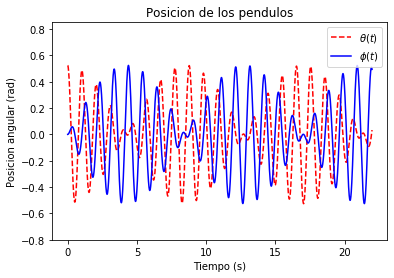

In [33]:
#Se hace una llamada al metodo y se almacenan los resultados en los arreglos t, theta, y phi
t,theta,phi = RungeKutta(thetadot, ydot, phidot,xdot,0,3.14/6,0,0,0,7*3.14,0.0001)
tst = []
for i in range(len(t)):
    tst.append(theta[i]+phi[i])

#Se muestran resultados
plt. plot(t, theta,'r--',label='$\\theta(t)$')
plt.plot(t, phi,'b',label='$\\phi(t)$')
#plt.plot(t, tst,'g--')
plt.ylabel('Posicion angular (rad)')
plt.xlabel('Tiempo (s)')
plt.title('Posicion de los pendulos')
plt.legend(loc='upper right')
plt.ylim(-.8,0.85)
plt.show()

## Interpretación

Al observar la función resultado de las posiciones angulares de cada masa en el tiempo, parece evidente que dicha función está compuesta por una combinación lineal de funciones trigonométricas, dichas funciones son los **modos normales del sistema**.
Para encontrar estas funciones se procede de esta manera:
Si se supone que $\theta = \phi$, es decir, que la posicion inicial de ambos pendulos es la misma,
$$
    \ddot{\theta} = \theta \left (\frac{-g}{L} - \frac{k}{m} \right) + \theta \frac{k}{m}\\
    \ddot{\theta} +\theta \frac{g}{L} = 0
$$
La cual es la ecuacion diferencial de un movimiento armónico simple al hacer uso de la aproximación de ángulos pequeños mencionada anteriormente.
$$
    \theta(t) = c_1 \sin\left(\sqrt\frac{g}{L} t\right) + c_2 \cos\left(\sqrt\frac{g}{L} t\right)
$$

Por otro lado, si se supone lo contrario, es decir , que $\theta = -\phi$;
$$
    \ddot{\theta} = \theta \left(\frac{-g}{L} - \frac{k}{m} \right) - \frac{k}{m}\theta \\
    \ddot{\theta} + \frac{g}{L}\theta + \frac{2k}{m}\theta= 0\\
    \therefore \theta(t) = c\cos\left(\sqrt{\frac{g}{l} + \frac{2k}{m}}t + \phi_0 \right)
$$
    en donde $\phi_0$ es un desfase inicial. 
    Ambas ecuaciones conforman el conjunto de modos normales de oscilación, que en cierto sentido pueden considerarse un conjunto fundamental de soluciones al sistema de ecuaciones diferenciales, puesto que cada una tiene una _copia_ en $\phi(t)$. Gráficamente, estas curvas se ven de esta forma para el ángulo $\theta$

In [27]:

def theta_1(t,c_1,c_2):
	return c_1*math.sin(math.sqrt(g/l)*t)+c_2*math.cos(math.sqrt(g/l)*t)

def theta_2(t,c_1,c_2):
	return c_1*math.cos(math.sqrt((g/l)+(2*k/(m)))*t + c_2)

In [28]:
t = np.arange(0,5*3.14,0.01)
t_1 = []
t_2 = []
t_3 = []
for i in t: t_1.append(theta_1(i,0.7,0.7))

for j in t: t_2.append(theta_2(j,1,0))
    
for k in range(len(t)): t_3.append(t_1[k]+t_2[k])

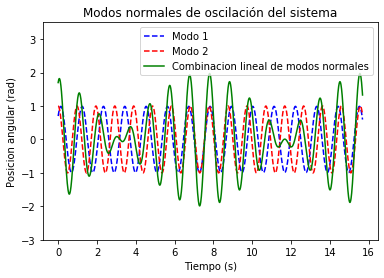

In [32]:
plt.title('Modos normales de oscilación del sistema')
plt.plot(t,t_1,'b--',label='Modo 1')
plt.plot(t,t_2,'r--',label='Modo 2')
plt.plot(t,t_3,'g',label='Combinacion lineal de modos normales')
plt.ylabel('Posicion angular (rad)')
plt.xlabel('Tiempo (s)')
plt.legend(loc='upper right')
plt.ylim(-3,3.5)
plt.show()